In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [14]:
# Загружаем данные c numpy, так как далле потребуется перевести в тензоры
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

### Переводим данные в тензоры, так как изображение 28 на 28 пикселей

In [228]:
train_label=train[:,0] # таргеты
train_img=train[:,1:].reshape(train.shape[0], 28,28)
test_img = np.resize(test, (test.shape[0], 28, 28))
print('train_img',train_img.shape)
print('test_img',test_img.shape)

train_img (42000, 28, 28)
test_img (28000, 28, 28)


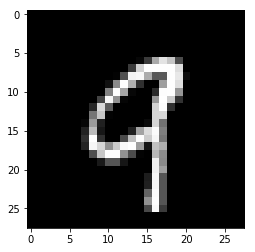

In [229]:
plt.imshow(train_img[41999],cmap='gray')

### Визуализируем данные

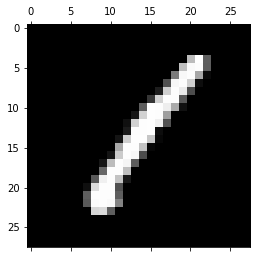

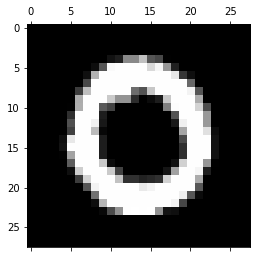

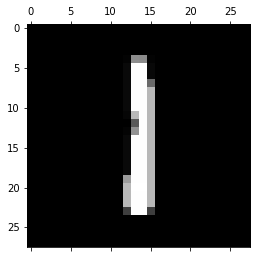

In [230]:
for i in range(0,3):
    plt.matshow(train_img[i],cmap='gray') # matshow - показать изображения представленные матрицами, одну картинку просто imshow

In [231]:
#help(cv2.HOGDescriptor())

### Переводим в необходимый формат для дальнейшей работы с нахождением градиентов

In [232]:
cv_img=train_img.astype(np.uint8)
print(cv_img[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254
  231  54  15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254
  254 254 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  61 191 254 254 254 254 254 109  83 19

Описание признаков здесь - https://docs.opencv.org/2.4/modules/gpu/doc/object_detection.html

### Построим HOG для уменьшения признаков в изображении

In [238]:
winSize = (28,28) # размер изображения
blockSize = (14,14)
blockStride = (7,7)
cellSize = (7,7)
nbins = 1
derivAperture = 1
winSigma = 4
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 12

hog=cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                    histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

In [239]:
winStride = (5,5)
padding = (8,8)
locations = ((0,0),)
hist=hog.compute(cv_img[0], winStride,padding,locations)
hist.shape

(36, 1)

### Составим таблицу из полученных дискрипторов

In [240]:
h=hist.reshape(1,hist.shape[0])
df=pd.DataFrame(h)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,0.995025,0.000886,0.26237,0.679844,0.679844,0.395331,0.406374,...,0.498753,0.498753,0.631302,0.631302,0.443326,0.0086,0.995025,0.0,0.0,0.0


In [241]:
for i in range(1,len(cv_img)):
    hist=hog.compute(cv_img[i], winStride,padding,locations)
    h=hist.reshape(1,hist.shape[0])
    df=df.append(pd.DataFrame(h))

In [242]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.000000,0.000000,0.000000,0.995025,0.000886,0.262370,0.679844,0.679844,0.395331,0.406374,...,0.498753,0.498753,0.631302,0.631302,0.443326,0.008600,0.995025,0.000000,0.000000,0.000000
0,0.332056,0.542929,0.542929,0.542929,0.498753,0.498753,0.498753,0.498753,0.535539,0.366396,...,0.311960,0.546876,0.498753,0.498753,0.498753,0.498753,0.507684,0.507684,0.507684,0.470851
0,0.000000,0.000000,0.704616,0.704616,0.000000,0.000000,0.704616,0.704616,0.000000,0.000000,...,0.000000,0.000000,0.704616,0.704616,0.000000,0.000000,0.704616,0.704616,0.000000,0.000000
0,0.498753,0.498753,0.498753,0.498753,0.537085,0.359523,0.537085,0.537085,0.432223,0.034907,...,0.194348,0.564680,0.522376,0.522376,0.419706,0.522376,0.498753,0.498753,0.498753,0.498753
0,0.352940,0.538534,0.538534,0.538534,0.498753,0.498753,0.498753,0.498753,0.498753,0.498753,...,0.372681,0.534096,0.498753,0.498753,0.498753,0.498753,0.498753,0.498753,0.498753,0.498753


In [243]:
df.shape

(42000, 36)

In [244]:
train_label_cut=train_label
train_label_cut.shape

(42000,)

### Разбиваем на трейновую и валидацианную выборки. Получаем модель и score для нее

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train,X_test,y_train,y_test=train_test_split(df, train_label_cut, random_state=0, test_size=0.2)

In [247]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

In [248]:
knn=neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7825

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [255]:
RFC=RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1)
RFC.fit(X_train, y_train)
y_pred=RFC.predict(X_test)
accuracy_score(y_test, y_pred)

0.8469047619047619

### Подготовим тестовые данные для создания submit для kaggle

In [256]:
cv_img_test=test_img.astype(np.uint8)

In [257]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (7,7)
cellSize = (7,7)
nbins = 1
derivAperture = 1
winSigma = 4
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 12

hog=cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                    histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

In [258]:
winStride = (5,5)
padding = (8,8)
locations = ((0,0),)
hist=hog.compute(cv_img_test[0], winStride,padding,locations)
hist.shape

(36, 1)

In [259]:
h=hist.reshape(1,hist.shape[0])
df_hog_test=pd.DataFrame(h)
df_hog_test.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.203227,0.227089,0.670981,0.670981,0.244683,0.558139,0.558139,0.558139,0.550439,0.292494,...,0.313014,0.546676,0.498753,0.498753,0.498753,0.498753,0.498753,0.498753,0.498753,0.498753


In [260]:
for i in range(1,len(cv_img_test)):
    hist=hog.compute(cv_img_test[i], winStride,padding,locations)
    h=hist.reshape(1,hist.shape[0])
    df_hog_test=df_hog_test.append(pd.DataFrame(h))

In [261]:
df_hog_test.shape

(28000, 36)

In [262]:
y_pred_test=RFC.predict(df_hog_test)

In [263]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_pred_test, 1):
        dst.write('%s,%d\n' % (i, p))

In [264]:
import pandas as pd
result=pd.read_csv('submit.txt')
result.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,9
4,5,8
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
